# ASTR597 Big Data
# Homework 1

# Problem 1: Querying and data analysis with SDSS

###  Write (and execute) an SQL query to count how many stars have been observed with SDSS (in the current Data Release 12).

SQL query to find all the records of type "Star" which is type = 6, from DR12.

SELECT
  COUNT(DISTINCT s.objID)

from
  Star s
  
where
  s.type = 6
  
into
  mydb.hw1_count1
  
The result of which was 260562744 stars

###   Write (and execute) an SQL query to count how many observations there are in u, g, r, i and z bands, and the average observed magnitude in each band. How does the SDSS database record missing (magnitude) data?

To see how missing data is given, I wrote the following query to exclude stars of any physically observable magnitude and sampled the results:
    
SELECT s.g

FROM Star s

WHERE
 s.type = 6 AND 
 (s.g > 50 OR s.g < -50)

INTO mydb.hw1_test1

The value used for non-existent magnitudes appears to be -9999, which I can now exclude from the query on u, g, r, i and z bands.

SELECT
  COUNT(s.u) as N_u,
  COUNT(s.g) as N_g,
  COUNT(s.r) as N_r,
  COUNT(s.i) as N_i,
  COUNT(s.z) as N_z,
  AVG(s.u) as avg_u,
  AVG(s.g) as avg_g,
  AVG(s.r) as avg_r,
  AVG(s.i) as avg_i,
  AVG(s.z) as avg_z

from
  Star s
  
where
  s.type = 6
  
into
  mydb.hw1_bands
  
This was my first attempt. This is not right however, as it excludes all rows where ANY of the magnitudes are -9999 (thus all N's are equal). Although the following does not give me the table structured with different columns, I've already wasted too much time on this to figure out how to make the values as seperate columns. Without the UNION command, the output is solely 1 row and 2 columns. Apparently SQL ignores the naming of columns because UNION sticks in rows. There's probably some way to do this. MS Access has a neat user interface...

SELECT
  COUNT(s.u) as N_u,
  AVG(s.u) as avg_u
  
from 
  Star s
  
where
  s.type = 6 AND
  s.u != -9999 
  
UNION
  
SELECT
  COUNT(s.g) as N_g,
  AVG(s.g) as avg_g
  
from 
  Star s
  
where
  s.type = 6 AND
  s.u != -9999 
  
UNION
  
SELECT
  COUNT(s.r) as N_r,
  AVG(s.r) as avg_r
  
from 
  Star s
  
where
  s.type = 6 AND
  s.r != -9999    
  
UNION
  
SELECT
  COUNT(s.i) as N_i,
  AVG(s.i) as avg_i
  
from 
  Star s
  
where
  s.type = 6 AND
  s.i != -9999
  
UNION
  
SELECT
  COUNT(s.z) as N_z,
  AVG(s.z) as avg_z
  
from 
  Star s
  
where
  s.type = 6 AND
  s.z != -9999
  
into
  mydb.hw1_bands2


The result is:

N_u &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;avg_u<br>
260560369&nbsp;	20.4050218777808 (u)<br>
260561128&nbsp;	22.1786144835625 (g)<br>
260561128&nbsp;	23.3288564854166 (r) <br>
260561329&nbsp;	19.884311155378  (i)<br>
260561511&nbsp;	21.1340939801756 (z)

### Write an SQL query to select the positions (α, also known as ra, and δ, also know as dec) and the extinction-corrected (a.k.a. dereddened) g and r-band magnitudes of all stars bounded by 225<α<235 and −2.5<δ<4. Your query should store the outputs into a temporary table in MyDB. Download it as a FITS file. Use the astropy.tables module to load the table data into Python, then store it into a local sqlite database (using Pandas to_sql() functions).

I used the following to generate this query:

SELECT 
  ra,dec,dered_u,dered_g,dered_i,dered_r,dered_z
  
FROM 
  Star
  
WHERE
  type = 6 AND
  (ra BETWEEN 225 AND 235) AND
  (dec BETWEEN -2.5 AND 4.0)
  
INTO
  mydb.hw1_2

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import sqlite3

In [2]:
dered = Table.read('hw1_2_alinc.fit')
dered

ra,dec,dered_u,dered_g,dered_i,dered_r,dered_z
float64,float64,float32,float32,float32,float32,float32
225.602448089,-0.195668290792,24.1544,24.7016,22.813,22.5352,21.5601
225.602444932,-0.107223308788,23.1537,23.3127,20.8832,21.8738,20.4398
225.602836451,-0.191826940555,22.2018,21.0497,20.2681,20.5156,20.3292
225.602980413,-0.0136369926143,23.1411,20.6522,18.5434,19.2946,18.179
225.488700314,-0.179602289701,23.2737,24.5401,21.5589,23.2067,21.0324
225.488474982,-0.194790542331,23.2557,22.684,20.4941,21.5463,19.6207
225.490917947,-0.197242309828,22.485,22.4992,22.7949,22.2821,22.972
226.475174803,-1.08256044432,22.7172,22.795,23.0371,23.8693,21.9238
225.603878926,-0.138202854894,22.8237,24.6377,24.9956,23.9979,20.7335


In [3]:
con = sqlite3.connect("hw1_2.db")
df = dered.to_pandas() #I have no idea what this is or what this does. Another student helped with this. loading FITS into sqlite3 was not in the notes.
df.to_sql('dered1', con)

ValueError: Table 'dered1' already exists.

In [4]:
con.close()

### In an IPython notebook, make an ra vs dec scatter plot of the data. Note that the right ascension by convention increases from right to left; make sure your plot reflects that. What do you see near α∼229 and δ∼0? Do know what is this object?

In [5]:
con = sqlite3.connect("hw1_2.db")

In [6]:
hw1_3 = pd.read_sql("""
    SELECT
        *
    FROM 
        dered1
""", con)

In [7]:
hw1_3

,index,ra,dec,dered_u,dered_g,dered_i,dered_r,dered_z
0,0,225.602448,-0.195668,24.154364,24.701633,22.812988,22.535223,21.560061
1,1,225.602445,-0.107223,23.153719,23.312750,20.883183,21.873753,20.439848
2,2,225.602836,-0.191827,22.201836,21.049749,20.268141,20.515636,20.329191
3,3,225.602980,-0.013637,23.141069,20.652233,18.543409,19.294628,18.179047
4,4,225.488700,-0.179602,23.273682,24.540051,21.558903,23.206749,21.032373
5,5,225.488475,-0.194791,23.255724,22.683956,20.494146,21.546339,19.620735
6,6,225.490918,-0.197242,22.485018,22.499207,22.794928,22.282125,22.971983
7,7,226.475175,-1.082560,22.717197,22.794996,23.037106,23.869316,21.923773
8,8,225.603879,-0.138203,22.823730,24.637712,24.995550,23.997940,20.733465
9,9,225.491344,-1.229319,23.767982,23.970398,21.446711,22.081463,20.546692


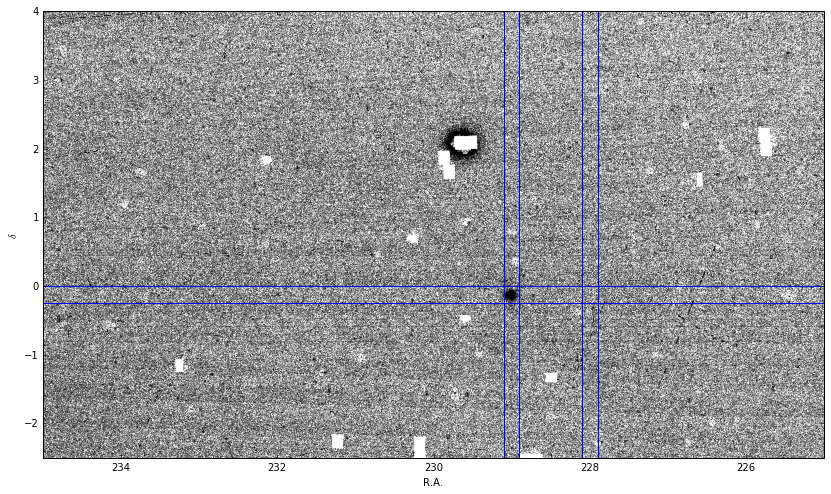

In [8]:
#Presuming you mean Dec vs RA plot...
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(hw1_3.ra, hw1_3.dec, marker='.', s=0.01)

ax.set_xlim(235, 225)
ax.set_ylim(-2.5, 4.)

ax.set_xlabel("R.A.")
ax.set_ylabel("$\delta$")

ax.axhline(y=0.0)
ax.axhline(y=-0.25)
ax.axvline(x=229.1)
ax.axvline(x=228.9)
          
ax.axvline(x=228.1)
ax.axvline(x=227.9)


Near RA ~ 229 and dec ~ 0, there is a very dense spot, which should represent a large cluster of stars because these are all data types corresponding to stars.

### 4. Select a subset of the data in a region (a rectangle is fine!) tightly bounding the observed object. Select data in another, equally sized region, nearby but away from the object. Do the selection in two ways: with an SQL query of your local sqlite database, and using the indexing operators in Python (the square brackets '[]'). Show that the two give identical results (it's sufficient to show they return the same number of rows for the same constraints).

In [9]:
hw1_4 = pd.read_sql("""
    SELECT
        *
    FROM
        dered1
    WHERE
        (ra BETWEEN 228.9 AND 229.1) AND
        (dec BETWEEN -0.25 AND 0.0)
""", con)

In [10]:
print(len(hw1_4))

2423


In [11]:
hw1_3b = hw1_3[(hw1_3.ra < 229.1) & (hw1_3.ra > 228.9) & (hw1_3.dec > -0.25) & (hw1_3.dec < 0.0) ]
print(len(hw1_3b))

2423


In [12]:
hw1_4b = hw1_3[(hw1_3.ra < 228.1) & (hw1_3.ra > 227.9) & (hw1_3.dec > -0.25) & (hw1_3.dec < 0.0) ]
print(len(hw1_4b))

804


The number of rows in both methods is the same, as expected.

### 5. Make two side-by-side scatter plots of the (dereddened) g−r color vs g-band magnitude. Note that the magnitude axis, by convention, always increases from top to bottom; make sure your plot reflects that. Compare the two and describe what you see.

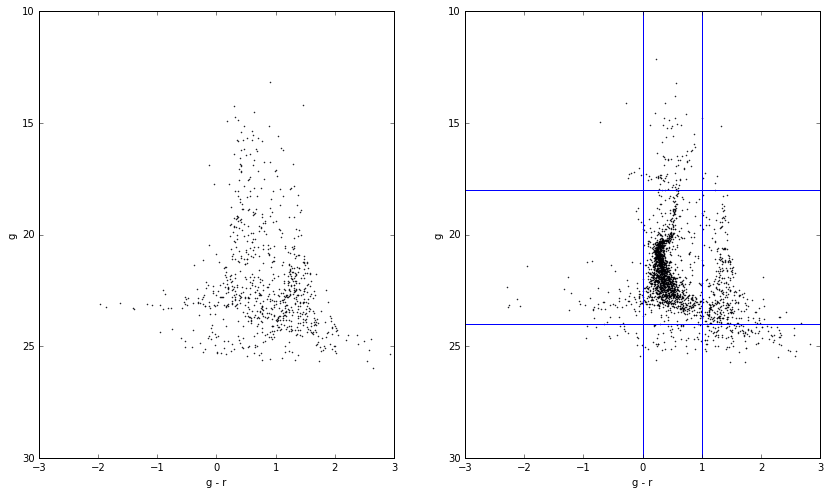

In [13]:
#Presuming you mean g-band magnitude vs g−r color magnitude (Y vs X)
fig = plt.figure(figsize=(14,8))
ax = plt.subplot(1,2,1)
ax.scatter(hw1_4b.dered_g[(hw1_4b.dered_g != -9999) & (hw1_4b.dered_r != -9999)] - 
           hw1_4b.dered_r[(hw1_4b.dered_g != -9999) & (hw1_4b.dered_r != -9999)], 
           hw1_4b.dered_g[hw1_4b.dered_g != -9999],marker='.', s=1.0)

ax.set_ylim(30., 10.)
ax.set_xlim(-3.,3.)

ax.set_xlabel("g - r")
ax.set_ylabel("g")

ax0 = plt.subplot(1,2,2)

ax0.scatter(hw1_4.dered_g[(hw1_4.dered_g != -9999) & (hw1_4.dered_r != -9999)] - 
            hw1_4.dered_r[(hw1_4.dered_g != -9999) & (hw1_4.dered_r != -9999)],
            hw1_4.dered_g[hw1_4.dered_g != -9999],marker='.', s=1.0)

ax0.set_ylim(30., 10.)
ax0.set_xlim(-3.,3.)

ax0.set_xlabel("g - r")
ax0.set_ylabel("g")

ax0.axhline(y=18.0)
ax0.axhline(y=24.0)
ax0.axvline(x=0.0)
ax0.axvline(x=1.0)


These plots have a similar overall shape, indicating the general properties of the population, but there are appoximately three times more stars in the right plot, which represents the cluster. They also appear to be more correlated in stellar color and magnitude, including a defined group moving off the main sequence, which is further evidence this is a globular cluster.

### 6. Identify a region in g−r vs g plot where the difference between the two plots appears greatest. From your original sample, select stars only present in that color-magnitude box, and plot them in ra vs dec scatter plot. Do you notice anything interesting?

I have identified the interesting area in the above plots. The area is 0 < g-r < 1 and 18 < g < 24

In [14]:
hw1_6 = hw1_3[(hw1_3.dered_g < 24.0) & (hw1_3.dered_g < 24.0) & 
              (hw1_3.dered_g - hw1_3.dered_r < 1.0) & (hw1_3.dered_g - hw1_3.dered_r > 0.0)]

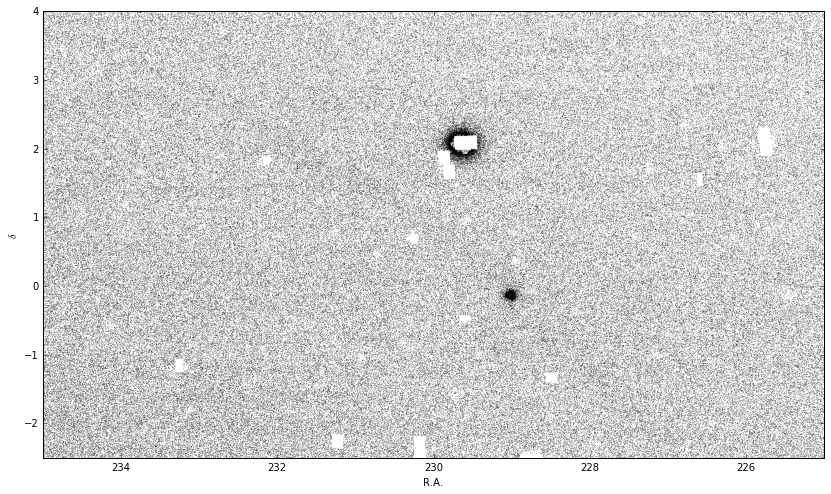

In [15]:
#Presuming you mean dec vs ra (Y vs X)
fig, ax = plt.subplots(figsize=(14,8))


#ax0 = plt.subplot(1,2,2)

ax.scatter(hw1_6.ra, hw1_6.dec, marker='.', s=0.01)

ax.set_xlim(235, 225)
ax.set_ylim(-2.5, 4.)

ax.set_xlabel("R.A.")
ax.set_ylabel("$\delta$")

#ax0.axhline(y=18.0)
#ax0.axhline(y=24.0)
#ax0.axvline(x=0.0)
#ax0.axvline(x=1.0)


I note the background is much fainter here, so there are many fewer stars in this color-magnitude range, but the dark cluster is still clearly present, as is the strange spot near  RA 230 and dec 2. I also note the line across the image going from upper left to lower right is a bit more clear. This color-magnitude space represents stars of similar spectral type and color, and so are probably of similar age, and is evidence this grouping is a globular cluster. 

### 7. Extra credit: how would you make the determination of the g−r vs g selection box more quantitative?

instead of doing this by eye (even though human eyes are great at this), numerically you could use the overdensity approach a la cosmic microwave background: Take an average of the image and calculate the overdensity in each region. You could then chose a certain degree of overdensity (such as in terms of standard deviations from the average) and analyze those regions. In this way, you could chose a shape in color-magnitude space rather than a box.

# Problem 2: Importing data into the Large Survey Database

In [16]:
import os
import lsd
from astropy.io import fits

db = lsd.DB(os.environ["LSD_DB"])

In [17]:
! lsd-admin create table --drop --schema=schema.yaml run94

Table 'run94' dropped.

-------- committing 20160226055748.996345 [run94] ---------
[run94] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.15 sec
[run94] Updating neighbors: Already up to date.
[run94] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.14 sec
[run94] Updating stats: [0 el.]>  0.00 sec
[run94] Marking tablets read-only...
----------- success 20160226055748.996345 [run94] ---------

Table 'run94' created.


### Download all files belonging to run 94, from http://data.sdss3.org/sas/dr12/boss/sweeps/dr9/301/. Use lsd-import to import these files.

In [18]:
hdulist = fits.open('calibObj-000094-1-star.fits')

In [19]:
hdulist.info()

Filename: calibObj-000094-1-star.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    194   133515R x 86C   [I, 3A, B, I, I, J, J, J, E, E, E, E, E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5E, J, J, J, J, J, J, E, E, E, E, E, E, J, E, E, E, E, E, E, E, 3A, I, I, 3A, B, B, A, D, 5E, I, 5E, 5E, 5E, 5E, 5I, 5J, 5E, 5E, 5E, 5E, 5E, 5I, 5J, 5E, 5E, 5E, 5E, 5E, 5I, 5J, 5E]   


Notes: The import is exacting on its data requirements. The field names must be exact, and the following errors exist from the data page we were directed to:

Key 'rowv' does not exist <br>
Key 'rowverr' does not exist <br>
Key 'colv' does not exist <br>
Key 'colverr' does not exist <br>
aperature6 is a FLOAT[5], not FLOAT <br>
Key 'tmass_matchdist' does not exist <br>
Key 'tmass_nmatch' does not exist


. I pulled the header data as given above, but it doesn't give field names. Very irritating. 

In [20]:
! lsd-import fits run94 calibObj-000094-*-star.fits

Importing from 6 pieces:
  ===> Imported calibObj-000094-5-star.fits                                            [1/6, 16.67%] + 136292/136292     136292 (0/0 min.)
  ===> Imported calibObj-000094-1-star.fits                                            [2/6, 33.33%] + 133515/133515     269807 (0/0 min.)
  ===> Imported calibObj-000094-4-star.fits                                            [3/6, 50.00%] + 130027/130027     399834 (0/0 min.)
  ===> Imported calibObj-000094-2-star.fits                                            [4/6, 66.67%] + 155355/155355     555189 (0/0 min.)
  ===> Imported calibObj-000094-3-star.fits                                            [5/6, 83.33%] + 124832/124832     680021 (0/0 min.)
  ===> Imported calibObj-000094-6-star.fits                                            [6/6, 100.00%] + 138113/138113     818134 (0/0 min.)
done

-------- committing 20160226055750.494483 [run94] ---------
[run94] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.27 sec


### Use lsd-footprint to compute the footprint of the run, and plot the result

In [21]:
! lsd-footprint run94 output.fits

 [48 el.]::::::::::::::::::::>  0.25 sec
Objects: 818134.0


In [22]:
plot94 = fits.getdata('output.fits')

In [23]:
plot94

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

(2650, 2750)

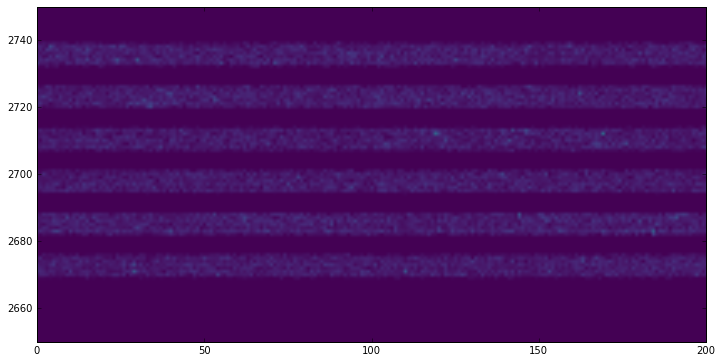

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

ax.imshow(plot94, cmap='viridis')
#ax.colorbar()
#ax.invert_yaxis()
ax.set_xlim([0,200])
ax.set_ylim([2650,2750])

This looks awful and I have no idea how to plot this, or how you'd expect I'd know how to without direct instruction. Thankfully, I have an awesome office mate, Jake, who is in my research group, and he is awesome at Python plotting. The following is thanks to him.

(2650, 2750)

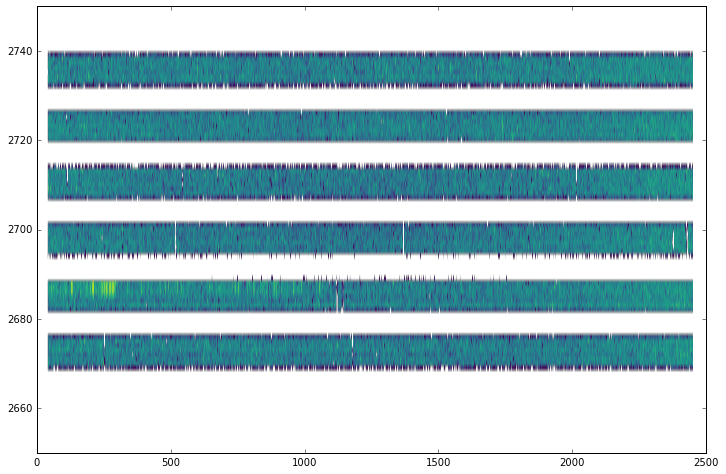

In [25]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(12,8))

ax.imshow(np.roll(plot94, 1740, axis=1), norm=LogNorm(), cmap='viridis', aspect='auto') 
#ax.colorbar()
#ax.invert_yaxis()
ax.set_xlim([0,2500])
ax.set_ylim([2650,2750])

Looks like noise to me.